## Project 2
-----
**Problem statement: Optimising survey features in house pricing survey** my main aim is to reduce the number of features being surveryed and thus making the survey easier for respondents and also reducing the probability of getting missing responses 

-	Create a regression model based on the Ames Housing Dataset
-	Predict the price of a house at sale

Data dictionary: [download here]('./data_dictionary.xlsx')

### **1. Import all your libraries/ modules**

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For linear model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
# For the polynomial model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', 999)  # This allows us to view all the columns
pd.set_option('display.max_rows', 999)

### **2. Query in data**

In [2]:
ames = pd.read_csv('./datasets/train.csv')

ames2 = pd.read_csv('./datasets/train.csv')

ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### **3. Data prepatration**

- Clean data
- Format data

**1. Output the columns of the data**

In [3]:
print("There are {} columns. They are:\n" .format(len(ames.columns)))
ames.columns

There are 81 columns. They are:



Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
print("There are {} unique Ids" .format(len(ames['Id'].unique())))

There are 2051 unique Ids


**2. Find columns with missing/null values**

In [5]:
# Get null values
def Get_null_vals(df):
    for null_values in df:
        df_null_values = df[null_values].isnull().sum()
        if df_null_values != 0:
            print(f'{null_values}: {df_null_values} null values')
            
Get_null_vals(ames)

Lot Frontage: 330 null values
Alley: 1911 null values
Mas Vnr Type: 22 null values
Mas Vnr Area: 22 null values
Bsmt Qual: 55 null values
Bsmt Cond: 55 null values
Bsmt Exposure: 58 null values
BsmtFin Type 1: 55 null values
BsmtFin SF 1: 1 null values
BsmtFin Type 2: 56 null values
BsmtFin SF 2: 1 null values
Bsmt Unf SF: 1 null values
Total Bsmt SF: 1 null values
Bsmt Full Bath: 2 null values
Bsmt Half Bath: 2 null values
Fireplace Qu: 1000 null values
Garage Type: 113 null values
Garage Yr Blt: 114 null values
Garage Finish: 114 null values
Garage Cars: 1 null values
Garage Area: 1 null values
Garage Qual: 114 null values
Garage Cond: 114 null values
Pool QC: 2042 null values
Fence: 1651 null values
Misc Feature: 1986 null values


In [6]:
def Get_zero_vals(df):
    for zero_values in df:
        df_zero_values = (df[zero_values] == 0).sum()
        if df_zero_values != 0:        
            print(f'{zero_values}: {df_zero_values} Zeros')
            
Get_zero_vals(ames)

Mas Vnr Area: 1216 Zeros
BsmtFin SF 1: 657 Zeros
BsmtFin SF 2: 1803 Zeros
Bsmt Unf SF: 165 Zeros
Total Bsmt SF: 54 Zeros
2nd Flr SF: 1191 Zeros
Low Qual Fin SF: 2018 Zeros
Bsmt Full Bath: 1200 Zeros
Bsmt Half Bath: 1923 Zeros
Full Bath: 8 Zeros
Half Bath: 1308 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 1000 Zeros
Garage Cars: 113 Zeros
Garage Area: 113 Zeros
Wood Deck SF: 1075 Zeros
Open Porch SF: 912 Zeros
Enclosed Porch: 1724 Zeros
3Ssn Porch: 2025 Zeros
Screen Porch: 1870 Zeros
Pool Area: 2042 Zeros
Misc Val: 1986 Zeros


**3. Deal with missing/ null values**

    1. Lot Frontage: Linear feet of street connected to property
        - Frontage is the boundary between a plot of land or a building and the road onto which the plot or building fronts. (https://en.wikipedia.org/wiki/Frontage)
        - There are 330 null values out of 2051 values while it is almost impossible for a plot to not have lot frontage 
        - Possibilities why there may not be lot frontage: 
            - All null value houses dont lead out to the street, rather they lead out to an alley 
            - All null value houses are actually condos  
        - These possibilities have been checked and have been rejected as: 
            - For null lot frontage houses that only 8 of them have alleys
            - Looking at housing MS SubClass, none of them are multi-residential and 131 of them are marked as ‘1-STORY 1946 & NEWER ALL STYLES’ so they can not all be condos

In [7]:
ames.loc[ames['Lot Frontage'].isnull()]['Alley'].value_counts().sum()

8

In [8]:
ames.loc[ames['Lot Frontage'].isnull()]['MS SubClass'].value_counts().head()

20     131
60      86
120     23
80      23
50      16
Name: MS SubClass, dtype: int64

In [9]:
ames2.loc[ames['Lot Frontage'].isnull()]['Neighborhood'].value_counts().head()

NAmes      45
Sawyer     40
Gilbert    38
NWAmes     29
CollgCr    26
Name: Neighborhood, dtype: int64

In [10]:
#ames.loc[ames['Lot Frontage'].isnull()]['Lot Config'].value_counts()

    - Therefore lies the need to fill up these missing datapoints:
        fill the empty cells with values averaged from houses within the same neighborhoods (as neighborhoods have a more uniform distribution of missing values)

In [11]:
ames['Lot Frontage'].fillna(ames.groupby('Neighborhood')['Lot Frontage'].transform("mean"), inplace=True)
ames['Lot Frontage'].isnull().sum()
ames[ames['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,916253320,120,RM,NaN,9763,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,230000


    - For both Green Hills (GrnHill) and Landmark (Landmrk), there are only 2 and 1 datapoints respectively, Therefore, either their columns has to be dropped or their data will not be taken when considering Lot data  

In [129]:
ames.loc[(ames['Neighborhood'] == "Landmrk") | (ames['Neighborhood'] == "GrnHill")]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,916253320,120,RM,NaN,9763,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,3.0,Attchd,1998,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,0.0,Detchd,1993,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,No pool,MnPrv,No Misc feature,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,No Bsmt,No Bsmt,No Bsmt,No Bsmt,0.0,No Bsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,0.0,Attchd,1986,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,11,2006,WD,230000


In [132]:
ames.loc[(ames['Neighborhood'] == "Landmrk") | (ames['Neighborhood'] == "GrnHill")].index

Int64Index([463, 1121, 1211], dtype='int64')

In [134]:
ames.drop(ames.loc[(ames['Neighborhood'] == "Landmrk") | (ames['Neighborhood'] == "GrnHill")].index, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


    2. Alley: Type of alley access to property
        - Options here are: Gravel (Grvl), Paved (Pave) or No alley access (NA) 
        - There are 1911 null values
        - Null values here can be replaced with "No Alley" as NA signifies the lack of an alley

In [13]:
ames['Id'].value_counts().sum() - ames['Alley'].value_counts().sum()

1911

In [14]:
ames['Alley'].fillna('No Alley', inplace= True)
ames['Alley'].value_counts()

No Alley    1911
Grvl          85
Pave          55
Name: Alley, dtype: int64

    3. Mas Vnr Type and Area
        - There are 22 null values for both Mas Vnr Type and Mas Vnr area --> these observations with null values will be considered as None - no masonry veneer and their area will be considered 0

In [89]:
ames['Mas Vnr Type'].fillna('None', inplace= True)
ames['Mas Vnr Area'].fillna(0, inplace= True)

    - There are 3 observations with 0 vlaue for area but with a type 
        - For this, as they all have the same MS Subclass, we will replace their 0 values will the mean area for MS Subclass 20

In [92]:
ames[(ames['Mas Vnr Area'] == 0) & (ames['Mas Vnr Type'] != 'None')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
669,1741,528222090,20,RL,64.0,7697,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1246.0,1246.0,GasA,Ex,Y,SBrkr,1258,0,0,1258,0.0,0.0,2,0,3,1,Gd,6,Typ,0,0.0,Attchd,2007,RFn,2.0,462.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,8,2007,New,173500
1136,1641,527252070,20,RL,60.0,8089,Pave,No Alley,Reg,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,8,6,2007,2007,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,945.0,Unf,0.0,474.0,1419.0,GasA,Ex,Y,SBrkr,1419,0,0,1419,1.0,0.0,2,0,2,1,Gd,7,Typ,1,4.0,Attchd,2007,RFn,2.0,567.0,TA,TA,Y,140,0,0,0,0,0,No pool,No fence,No Misc feature,0,10,2007,New,392000
1187,1786,528435060,20,RL,83.0,9849,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,6,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1689.0,1689.0,GasA,Ex,Y,SBrkr,1689,0,0,1689,0.0,0.0,2,0,3,1,Gd,7,Typ,0,0.0,Attchd,2007,RFn,3.0,954.0,TA,TA,Y,0,56,0,0,0,0,No pool,No fence,No Misc feature,0,6,2007,New,248328


In [103]:
ames[(ames['MS SubClass'] == 20)]['Mas Vnr Area'].mean()

113.08984375

In [104]:
mvamask = ames[(ames['Mas Vnr Area'] == 0) & (ames['Mas Vnr Type'] != 'None')].index
ames['Mas Vnr Area'][mvamask] = ames[(ames['MS SubClass'] == 20)]['Mas Vnr Area'].mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    - There are several observations with type "None" but area not zero --> The areas for this type will be replaced by 0

In [106]:
ames[(ames['Mas Vnr Area'] != 0) & (ames['Mas Vnr Type'] == 'None')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
765,1862,533352075,90,RL,72.774648,18890,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,3.0,BuiltIn,1977,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,No pool,No fence,Gar2,8300,8,2007,WD,190000
810,2529,534129230,60,RL,80.000000,10400,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1790,1.0,0.0,1,2,4,1,TA,8,Min2,1,3.0,Attchd,1972,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,No pool,No fence,No Misc feature,0,11,2006,WD,165150
1148,1914,535106140,20,RL,70.000000,10150,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,0.0,Attchd,1958,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,7,2007,COD,114500
1684,2004,902427140,20,RM,52.000000,8626,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,No Bsmt,No Bsmt,No Bsmt,No Bsmt,0.0,No Bsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,0.0,Attchd,1956,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,5,2007,WD,104500
1832,364,527166010,60,RL,72.025641,10762,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,1983,0.0,0.0,2,1,3,1,Gd,9,Typ,1,3.0,Attchd,1999,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,5,2009,WD,225000


In [107]:
mvamask2 = ames[(ames['Mas Vnr Area'] != 0) & (ames['Mas Vnr Type'] == 'None')].index
ames['Mas Vnr Area'][mvamask2] = 0

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    4. Strange Bsmt rows - Id 1342 contains NA for all the basement values and as such we will be removing it as we have no means of determining if it has a basement or not
    - If have time later - show how you found ID 1342

In [15]:
ames[ames['Id'] == 1342]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,1342,903230120,20,RM,99.0,5940,Pave,No Alley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [16]:
ames.drop([1327], axis = 0, inplace= True)

In [17]:
ames.shape

(2050, 81)

    5. Bsmt Qual and Cond - Basement Quality and Condition 
        - Ranking of 1 to 5 with NA to indicate no basement 
        - There are 54 null values 
        - These null values indicate the lack of a basement --> Therefore, we can replace NA as No Bsmt

In [18]:
ames['Id'].value_counts().sum() - ames['Bsmt Qual'].value_counts().sum()

54

In [19]:
ames['Bsmt Qual'].fillna('No Bsmt', inplace= True)
ames['Bsmt Cond'].fillna('No Bsmt', inplace= True)
ames['Bsmt Qual'].value_counts()

TA         887
Gd         864
Ex         184
Fa          60
No Bsmt     54
Po           1
Name: Bsmt Qual, dtype: int64

    6. Bsmt Exposure -  Refers to walkout or garden level walls for basement 
        - Ranking 1 to 5 with NA indicating no basement 
        - Same as Bsmt Qual and Cond 
        - However unlike Bsmt Qual and Cond, Bsmt Exposure has 57 null values of which only for 54 can we conclude that there is no basement 

In [20]:
ames['Id'].value_counts().sum() - ames['Bsmt Exposure'].value_counts().sum()

57

    - The dataset shows us that those 3 rows that have missing values for Bsmt Exposure, they contain values for Bsmt Qual and Cond. As such, we cannot deem them as "No Bsmt" --> we will be dropping those columns 

In [21]:
mask = (ames['Bsmt Exposure'].isnull() == True) & (ames['Bsmt Qual'] != 'No Bsmt')
ames[mask]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [22]:
imask = ames[(ames['Bsmt Exposure'].isnull() == True) & (ames['Bsmt Qual'] != 'No Bsmt')].index
ames.drop(imask, inplace=True)

In [23]:
ames.shape

(2047, 81)

In [24]:
ames['Id'].value_counts().sum() - ames['Bsmt Exposure'].value_counts().sum()

54

    - Now, we can fillna with "No Bsmt" just like 'Bsmt Qual' and 'Bsmt Cond'

In [25]:
ames['Bsmt Exposure'].fillna('No Bsmt', inplace= True)
ames['Bsmt Exposure'].value_counts()

No         1339
Av          288
Gd          203
Mn          163
No Bsmt      54
Name: Bsmt Exposure, dtype: int64

    7. BsmtFin Type 1 & 2 - The square feet of the finished basement type 1 & basement type 2
        - Type 1 consists of 54 null values which correspond to the null values due to a lack of basement
        - Type 2 consists of 54 null values corresponding to lack of basement and 1 null value which is a missing data point

In [27]:
ames['BsmtFin Type 1'].fillna('No Bsmt', inplace= True)

In [28]:
len(ames[(ames['BsmtFin Type 1'] == 'No Bsmt') & (ames['BsmtFin Type 2'].isnull() == True)])

54

In [32]:
i2mask = ames[(ames['BsmtFin Type 1'] == 'No Bsmt') & (ames['BsmtFin Type 2'].isnull() == True)].index
ames['BsmtFin Type 2'][i2mask] = 'No Bsmt'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
ames[ames['BsmtFin Type 2'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,445,528142130,20,RL,85.0,10655,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,4.0,Attchd,2003,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,No pool,No fence,No Misc feature,0,10,2009,WD,284000


In [137]:
ames['BsmtFin Type 2'].fillna('ALQ', inplace=True)

    8. Bsmt Full and half bath
        - A look at the data shows us that null values for Bsmt Full Bath and Bsmt Half Bath can be replaced by 0 as these points correspond to observation with no basement

In [39]:
ames[ames['Bsmt Full Bath'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,1498,908154080,20,RL,123.0,47007,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,No Bsmt,No Bsmt,No Bsmt,No Bsmt,0.0,No Bsmt,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [40]:
ames['Bsmt Full Bath'].fillna(0, inplace=True)
ames['Bsmt Half Bath'].fillna(0,inplace=True)

    9. Fireplace Qu - There are 998 NA values in fireplace quality 
        - A check with the numeber of fireplaces, we can deduce that these null values correspond to having no fireplaces
        - As such, null values will be converted to 0 and quality ranking will be convverted into numeric 1 to 5 

In [47]:
print(len(ames['Id']) - ames['Fireplace Qu'].value_counts().sum())
ames['Fireplace Qu'].value_counts()

998


Gd    522
TA    406
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [48]:
len(ames[ames['Fireplaces'] == 0])

998

In [52]:
cat_dict = {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
ames['Fireplace Qu'].replace(cat_dict, inplace=True)

In [53]:
ames['Fireplace Qu'].fillna(0, inplace=True)

In [54]:
ames['Fireplace Qu'].value_counts()

0.0    998
4.0    522
3.0    406
2.0     59
5.0     31
1.0     31
Name: Fireplace Qu, dtype: int64

    10. Garage features
        - Year built, finish, quality and cond have 114 missing values while garage type only has 113.
        - Therefore, i will drop the observation that has null values for all
        - Also I will input "No Garage" for the rest as all the NA values are across all rows

In [57]:
ames[(ames['Garage Type'].isnull() == False) & (ames['Garage Yr Blt'].isnull() == True)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,2237,910201180,70,RM,50.0,9060,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,0.0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [58]:
gmask = ames[(ames['Garage Type'].isnull() == False) & (ames['Garage Yr Blt'].isnull() == True)].index
ames.drop(gmask, inplace=True)

In [61]:
print(len(ames['Id']) - ames['Garage Type'].value_counts().sum())
ames['Garage Type'].value_counts()

113


Attchd     1210
Detchd      534
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [64]:
glist = ['Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond']

for i in ames.columns:
    if i in glist:
        ames[i].fillna("No Garage", inplace=True)

    11. Pool QC - pool quality, condition
        - Pool QC has 2037 null values
        - A look at the zero values show us that there are 2037 zero values for Pool Area 
        - These zero values correlate to the null vaues of Pool QC, thus I can deduce no pool for all of them

In [110]:
Get_zero_vals(ames)

Mas Vnr Area: 1237 Zeros
BsmtFin SF 1: 654 Zeros
BsmtFin SF 2: 1799 Zeros
Bsmt Unf SF: 165 Zeros
Total Bsmt SF: 54 Zeros
2nd Flr SF: 1189 Zeros
Low Qual Fin SF: 2013 Zeros
Bsmt Full Bath: 1197 Zeros
Bsmt Half Bath: 1920 Zeros
Full Bath: 8 Zeros
Half Bath: 1304 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 997 Zeros
Fireplace Qu: 997 Zeros
Garage Cars: 113 Zeros
Garage Area: 113 Zeros
Wood Deck SF: 1073 Zeros
Open Porch SF: 908 Zeros
Enclosed Porch: 1720 Zeros
3Ssn Porch: 2020 Zeros
Screen Porch: 1865 Zeros
Pool Area: 2037 Zeros
Misc Val: 1981 Zeros


In [66]:
print(len(ames['Id']) - ames['Pool QC'].value_counts().sum())
ames['Pool QC'].value_counts()

2037


Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [76]:
ames['Pool QC'].fillna('No pool', inplace=True)

    12. Fence - fence quality
        - There are 1648 null values for fence quality which correspond to the lack of fence

In [78]:
print(len(ames['Id']) - ames['Fence'].value_counts().sum())
ames['Fence'].value_counts()

1648


MnPrv    225
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [79]:
ames['Fence'].fillna('No fence', inplace=True)

    13. Misc Feature - Miscellaneous features not covered in other categories
        - There are 1981 null values for Misc Feature
        - These 1981 null values correspond to the zero values in Misc val --> As such we can deem it as the house not having Misc features

In [82]:
print(len(ames['Id']) - ames['Misc Feature'].value_counts().sum())
ames['Misc Feature'].value_counts()

1981


Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [81]:
Get_zero_vals(ames)

Mas Vnr Area: 1213 Zeros
BsmtFin SF 1: 654 Zeros
BsmtFin SF 2: 1799 Zeros
Bsmt Unf SF: 165 Zeros
Total Bsmt SF: 54 Zeros
2nd Flr SF: 1189 Zeros
Low Qual Fin SF: 2013 Zeros
Bsmt Full Bath: 1197 Zeros
Bsmt Half Bath: 1920 Zeros
Full Bath: 8 Zeros
Half Bath: 1304 Zeros
Bedroom AbvGr: 5 Zeros
Kitchen AbvGr: 2 Zeros
Fireplaces: 997 Zeros
Fireplace Qu: 997 Zeros
Garage Cars: 113 Zeros
Garage Area: 113 Zeros
Wood Deck SF: 1073 Zeros
Open Porch SF: 908 Zeros
Enclosed Porch: 1720 Zeros
3Ssn Porch: 2020 Zeros
Screen Porch: 1865 Zeros
Pool Area: 2037 Zeros
Misc Val: 1981 Zeros


In [83]:
ames['Misc Feature'].fillna('No Misc feature', inplace=True)

In [139]:
Get_null_vals(ames)

**4. Clean based on recommendation**

5 observations to remove from dataset - a plot of SALE PRICE versus GR LIV AREA will indicate them quickly 
- Three of them are true outliers (Partial Sales that likely don’t represent actual market values)
- Two of them are simply unusual sales (very large houses priced relatively appropriately)

Recommendation: Remove any houses with more than 4000 square feet from the data set


In [112]:
ames.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,72.774648,13517,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0.0,Attchd,1976,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,No pool,No fence,No Misc feature,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,3.0,Attchd,1997,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,No pool,No fence,No Misc feature,0,4,2009,WD,220000


In [116]:
ames.shape

(2046, 81)

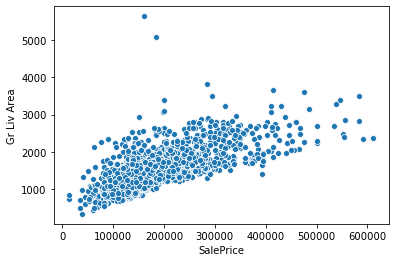

In [115]:
ax = sns.scatterplot(x = 'SalePrice', y= 'Gr Liv Area', data = ames)

In [117]:
ames = ames[ames['Gr Liv Area'] <= 4000 ]

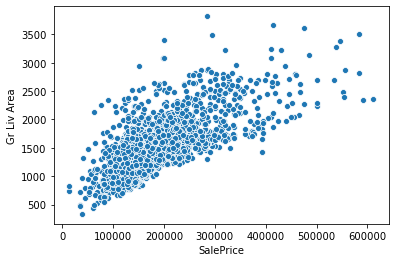

In [119]:
ax = sns.scatterplot(x = 'SalePrice', y= 'Gr Liv Area', data = ames)

In [121]:
ames.shape

(2044, 81)

**5. Export**

In [142]:
ames.to_csv('./datasets/ames_train_cleaned.csv', index=False)

### **4. EDA**

**1. Identify outliers**
- box-plot - for both numerical and nominal data
- scatter plot - for numerical data 
- histogram - for nominal and ordinal data

**2. Categorise variables** 
- Data types 
- Indicators

**3. Find and eliminate correlated variable**